In [ ]:
! pip install pingouin
! pip install missingno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=d65a824adfaaf935a3672ac91b8323029c4a46743a2b7085df6ab2cd0af6efc5
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pingouin as pg
from scipy import stats

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import auc,accuracy_score,classification_report, roc_curve, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")
import warnings
warnings.filterwarnings("ignore")

<ipython-input-3-6b2f5f2850fa>:24: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
df=pd.read_csv("/content/train.csv")
df_copy=df.copy()
df_copy.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Incorrect values have been inputted for age and Credit_Mix. There might be inaccuracies in other variables as well, and we will thoroughly investigate this matter.

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
#checking missing values
df_copy.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
# checking duplicated data
df_copy[df_copy.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [ ]:
#deleting unneccasary features
df_copy.drop(["ID","Name","SSN"], axis=1, inplace=True)

In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


The individual's count of bank accounts exhibits an unusually high maximum value, and notably, its minimum value is negative, even though this variable is not expected to have negative values. Similarly, the count of credit cards for the individual also shows an exceptionally high maximum value. Furthermore, the number of credit card inquiries made by the individual indicates an exceptionally high maximum value. These instances suggest the presence of outlier observations within the dataset.


In [ ]:
df_copy.describe(exclude=np.number).T

,count,unique,top,freq
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Age,100000,1788,38,2833
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408
Num_of_Delayed_Payment,92998,749,19,5327
Changed_Credit_Limit,100000,4384,_,2091
Credit_Mix,100000,4,Standard,36479


In [ ]:
wrong_numeric_list=["Age","Annual_Income","Num_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit","Outstanding_Debt","Amount_invested_monthly","Monthly_Balance"]

for i in wrong_numeric_list:
    print(df_copy[i].unique())

['23' '-500' '28_' ... '4808_' '2263' '1342']
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590' '696' '1185_'
 '1465' '911' '1181' '70' '816' '1369' '143' '1416' '455' '55' '1096'
 '1474' '420' '1131' '904' '89' '1259' '527' '1241' '449' '983' '418'
 '319' '23' '238' '638' '138' '235_' '280' '1070' '1484' '274' '494'
 '1459_' '404'

In [ ]:
for i in wrong_numeric_list:
    # Remove underscores
    df_copy[i] = df_copy[i].str.replace("_", "")

    try:
        # Attempt to convert to float
        df_copy[i] = df_copy[i].astype("float")
    except ValueError:
        # Handle the case where conversion to float fails
        print(f"Conversion to float failed for column {i}")

Conversion to float failed for column Changed_Credit_Limit


After removing underscores, the "Changed_Credit_Limit" column contains some undefined values, preventing the conversion to float. Therefore, let's address this issue first.

In [ ]:
for i in df_copy[df_copy["Changed_Credit_Limit"]==""].index.tolist():
    df_copy.loc[i,"Changed_Credit_Limit"]=np.nan


In [ ]:
df_copy["Changed_Credit_Limit"]=df_copy["Changed_Credit_Limit"].astype("float")

In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,24.000000,33.000000,42.000000,8.698000e+03
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,92998.0,3.092334e+01,2.260319e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,3.697000e+01


The age variable has a minimum value of -500, which is not plausible as age should not be negative. Similarly, the minimum values for Num_Bank_Accounts and Num_of_Loan are -1 and -100, respectively, and these variables should not have negative values. However, it's worth noting that Delay_from_due_date can legitimately contain negative values, possibly indicating that the customer paid the loan before the due date. Additionally, there are outlier values present in the numerical variables.

In [ ]:
for i in ["Age","Num_Bank_Accounts","Num_of_Loan"]:
    df_copy.loc[df_copy[i]<0,i]=np.nan

In [ ]:
for i in df_copy.select_dtypes(include="object").columns.tolist():
    print(f">>>>>>>>>{i} value counts<<<<<<<<<")
    print(df_copy[i].value_counts())

>>>>>>>>>Customer_ID value counts<<<<<<<<<
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
>>>>>>>>>Month value counts<<<<<<<<<
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
>>>>>>>>>Occupation value counts<<<<<<<<<
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
>>>>>>>>>Type_of_Loan value counts<<<<<<<<<
Not Specified                                             

credit history transformation to total number of months


In [ ]:
def count_month(i):
    if pd.notnull(i):
        year=int(i.split(" ")[0])
        month=int(i.split(" ")[3])

        return (year*12)+month
    else:
        return i

In [ ]:
df_copy['Credit_History_Age'] = df_copy.Credit_History_Age.apply(lambda i: count_month(i)).astype(float)
df_copy['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

Refining the Payment_of_Min_Amount:

In [ ]:
df_copy['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [ ]:
df_copy['Payment_Behaviour']= df_copy['Payment_Behaviour'].replace("!@9#%8",np.nan)


refining occupation


In [ ]:
df_copy["Occupation"]=df_copy["Occupation"].replace("_______",np.nan)

Credit_Mix

In [ ]:
df_copy["Credit_Mix"]=df_copy["Credit_Mix"].replace("_",np.nan)

Type_of_Loan:
1) there are more than one type of loan in some observation
2)Creating dummy variable (avoid dummy variable trap)


In [ ]:
df_copy["Type_of_Loan"].value_counts()[:30]

Not Specified                                    1408
Credit-Builder Loan                              1280
Personal Loan                                    1272
Debt Consolidation Loan                          1264
Student Loan                                     1240
Payday Loan                                      1200
Mortgage Loan                                    1176
Auto Loan                                        1152
Home Equity Loan                                 1136
Personal Loan, and Student Loan                   320
Not Specified, and Payday Loan                    272
Mortgage Loan, and Home Equity Loan               264
Student Loan, and Payday Loan                     256
Credit-Builder Loan, and Not Specified            248
Student Loan, and Credit-Builder Loan             248
Payday Loan, and Auto Loan                        240
Payday Loan, and Debt Consolidation Loan          240
Payday Loan, and Student Loan                     232
Personal Loan, and Credit-Bu

In [ ]:
TF={
    True:1,
    False:0}
for i in df_copy["Type_of_Loan"].value_counts().head(9).index[1:]:
    df_copy[i]=df_copy["Type_of_Loan"].str.contains(i).map(TF)

df_copy.drop("Type_of_Loan",axis=1,inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       99114 non-null   float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         99979 non-null   float64
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               96124 non-null   float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

Customer_Id

In [ ]:
df_copy['Customer_ID'] = df_copy.Customer_ID.apply(lambda i: int(i[4:], 16))

Handling Missing Value:
We will utilize the KNN Imputer method to impute missing values in the loan type variables.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
for i in df_copy.columns[-8:].tolist():
    imputer.fit(df_copy[['Customer_ID',i]])
    df_copy[['Customer_ID',i]] = imputer.transform(df_copy[['Customer_ID',i]])

df_copy.isnull().sum()

Customer_ID                     0
Month                           0
Age                           886
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts              21
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3876
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
Credit-Builder Loan             0
Personal Loan                   0
Debt Consolidation Loan         0
Student Loan                    0
Payday Loan                     0
Mortgage Loan 

<Figure size 1000x800 with 0 Axes>

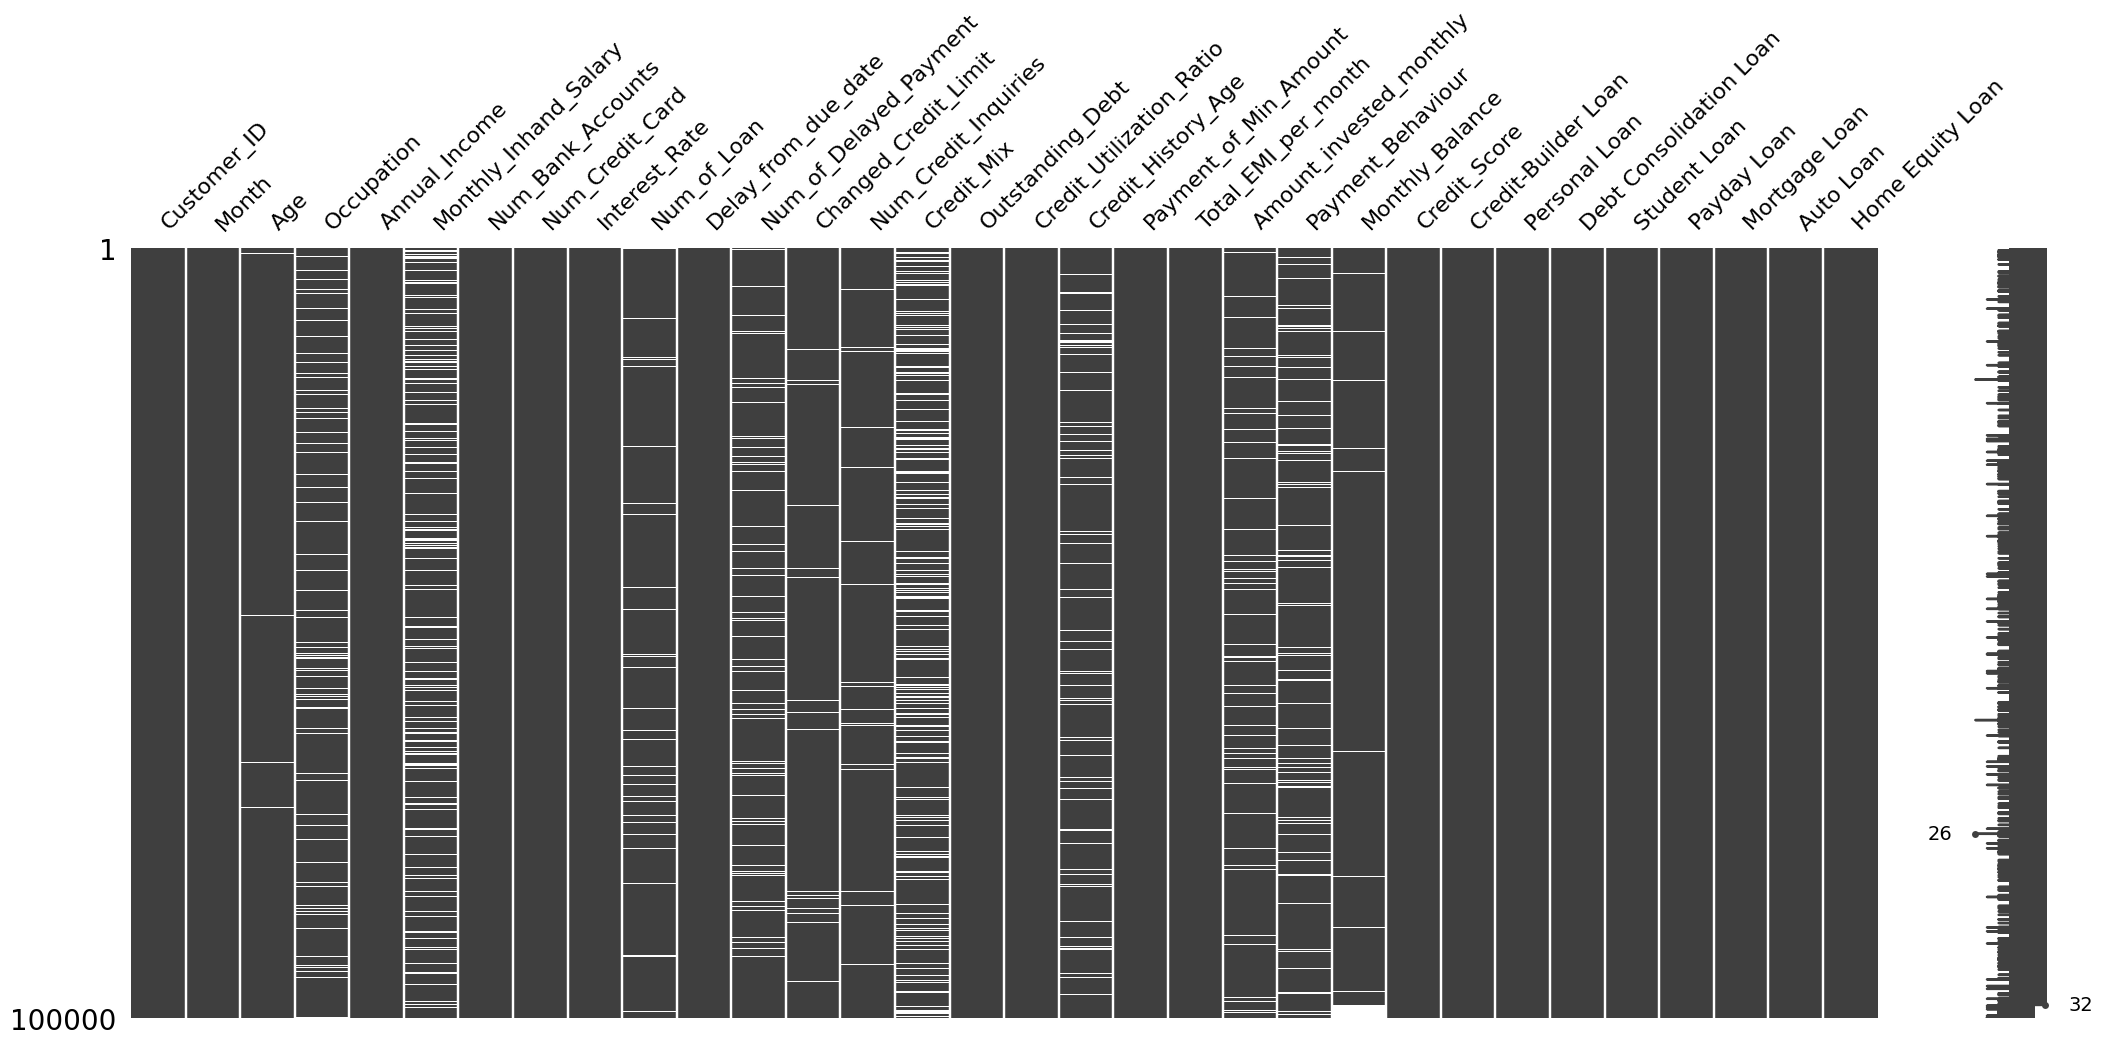

In [ ]:
plt.figure(figsize=(10,8))
msno.matrix(df_copy)
plt.show()

<Figure size 800x600 with 0 Axes>

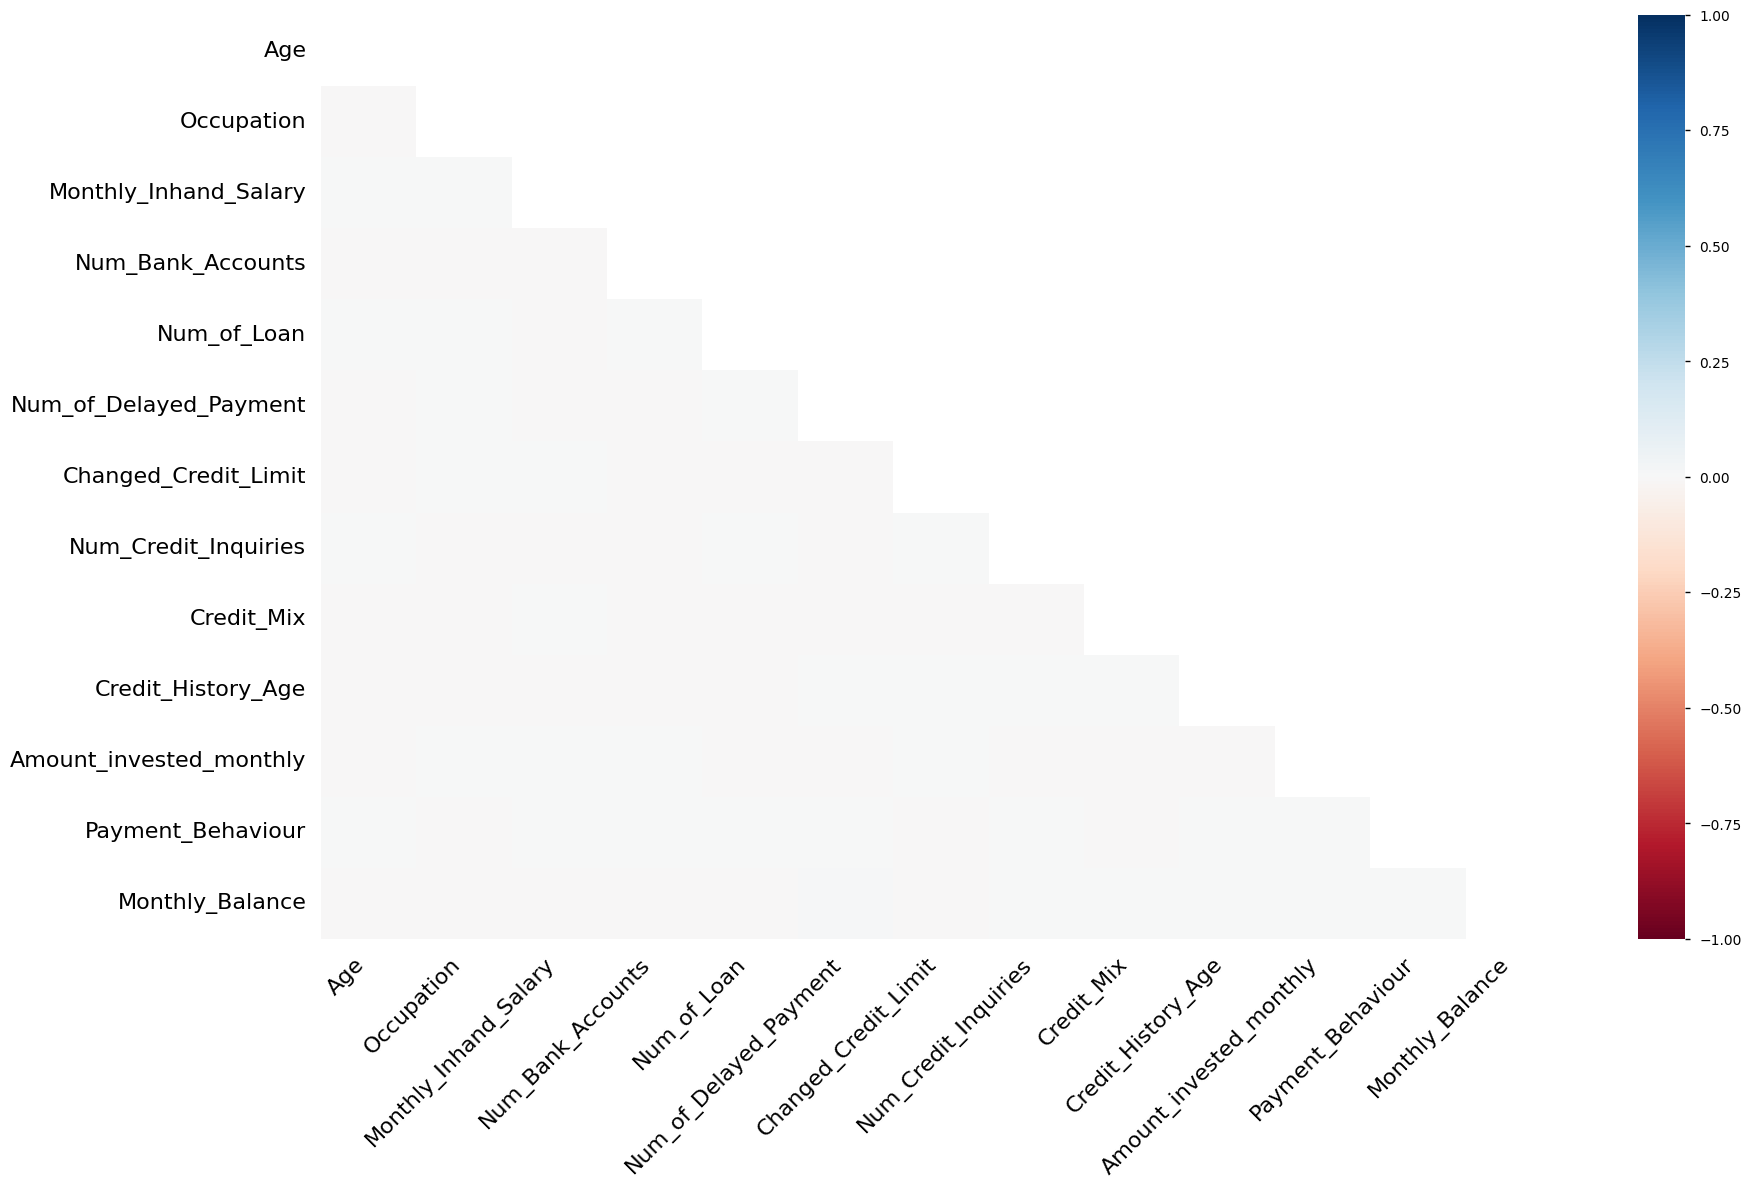

In [ ]:
plt.figure(figsize=(8,6))
msno.heatmap(df_copy)
plt.show()
# correlation matrix between null values are zero, in case that there is high coreelation it means they are not random and better to delete them

In [ ]:
def categorical_fill_na(data, col):
    index=list(data[col][data[col].isnull()].index)
    for i in index:
        col_pred=data[col][data["Customer_ID"]==data.iloc[i]["Customer_ID"]].mode()[0]
        col_mode=data[col].mode()[0]
        if not pd.isna(col_pred):
            data[col].iloc[i]=col_pred
        else:
            data[col].iloc[i]=col_mode
    return list(data[col])

In [ ]:
df_copy.select_dtypes(include="object").columns

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [ ]:
# fill nan values for category variables
df_copy["Occupation"]=categorical_fill_na(data=df_copy,col="Occupation")
df_copy["Credit_Mix"]=categorical_fill_na(data=df_copy,col="Credit_Mix")
df_copy["Payment_Behaviour"]=categorical_fill_na(data=df_copy,col="Payment_Behaviour")
df_copy.isnull().sum()

Customer_ID                     0
Month                           0
Age                           886
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts              21
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3876
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
Credit-Builder Loan             0
Personal Loan                   0
Debt Consolidation Loan         0
Student Loan                    0
Payday Loan                     0
Mortgage Loan 

Handling missing value: numerical variable

In [ ]:
def numerical_fill_na(data, val):
    index_nan=list(data[val][data[val].isnull()].index)
    for i in index_nan:
        val_pred=data[val][data["Customer_ID"]==data.iloc[i]["Customer_ID"]].median()
        val_mmedian=data[val].median()
        if not pd.isna(val_pred):
            data[val].iloc[i]=val_pred
        else:
            data[val].iloc[i]=val_mmedian
    return list(data[val])

In [ ]:
df_copy["Age"]=numerical_fill_na(data=df_copy,val="Age")
df_copy["Monthly_Inhand_Salary"]=numerical_fill_na(data=df_copy,val="Monthly_Inhand_Salary")
df_copy["Num_Bank_Accounts"]=numerical_fill_na(data=df_copy,val="Num_Bank_Accounts")
df_copy["Num_of_Loan"]=numerical_fill_na(data=df_copy,val="Num_of_Loan")
df_copy["Num_of_Delayed_Payment"]=numerical_fill_na(data=df_copy,val="Num_of_Delayed_Payment")
df_copy["Changed_Credit_Limit"]=numerical_fill_na(data=df_copy,val="Changed_Credit_Limit")
df_copy["Num_Credit_Inquiries"]=numerical_fill_na(data=df_copy,val="Num_Credit_Inquiries")
df_copy["Credit_History_Age"]=numerical_fill_na(data=df_copy,val="Credit_History_Age")
df_copy["Amount_invested_monthly"]=numerical_fill_na(data=df_copy,val="Amount_invested_monthly")
df_copy["Monthly_Balance"]=numerical_fill_na(data=df_copy,val="Monthly_Balance")
df_copy.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit-Builder Loan         0
Personal Loan               0
Debt Consolidation Loan     0
Student Loan                0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

Outliers:

Within this segment, we'll address outliers through the utilization of the IQR method. We'll proceed by replacing outlier observations in continuous variables with the median value corresponding to the relevant variable.

In [ ]:
numerical_columns=df_copy.select_dtypes(include=["int64","float64"]).columns[1:-8].tolist()
numerical_columns

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

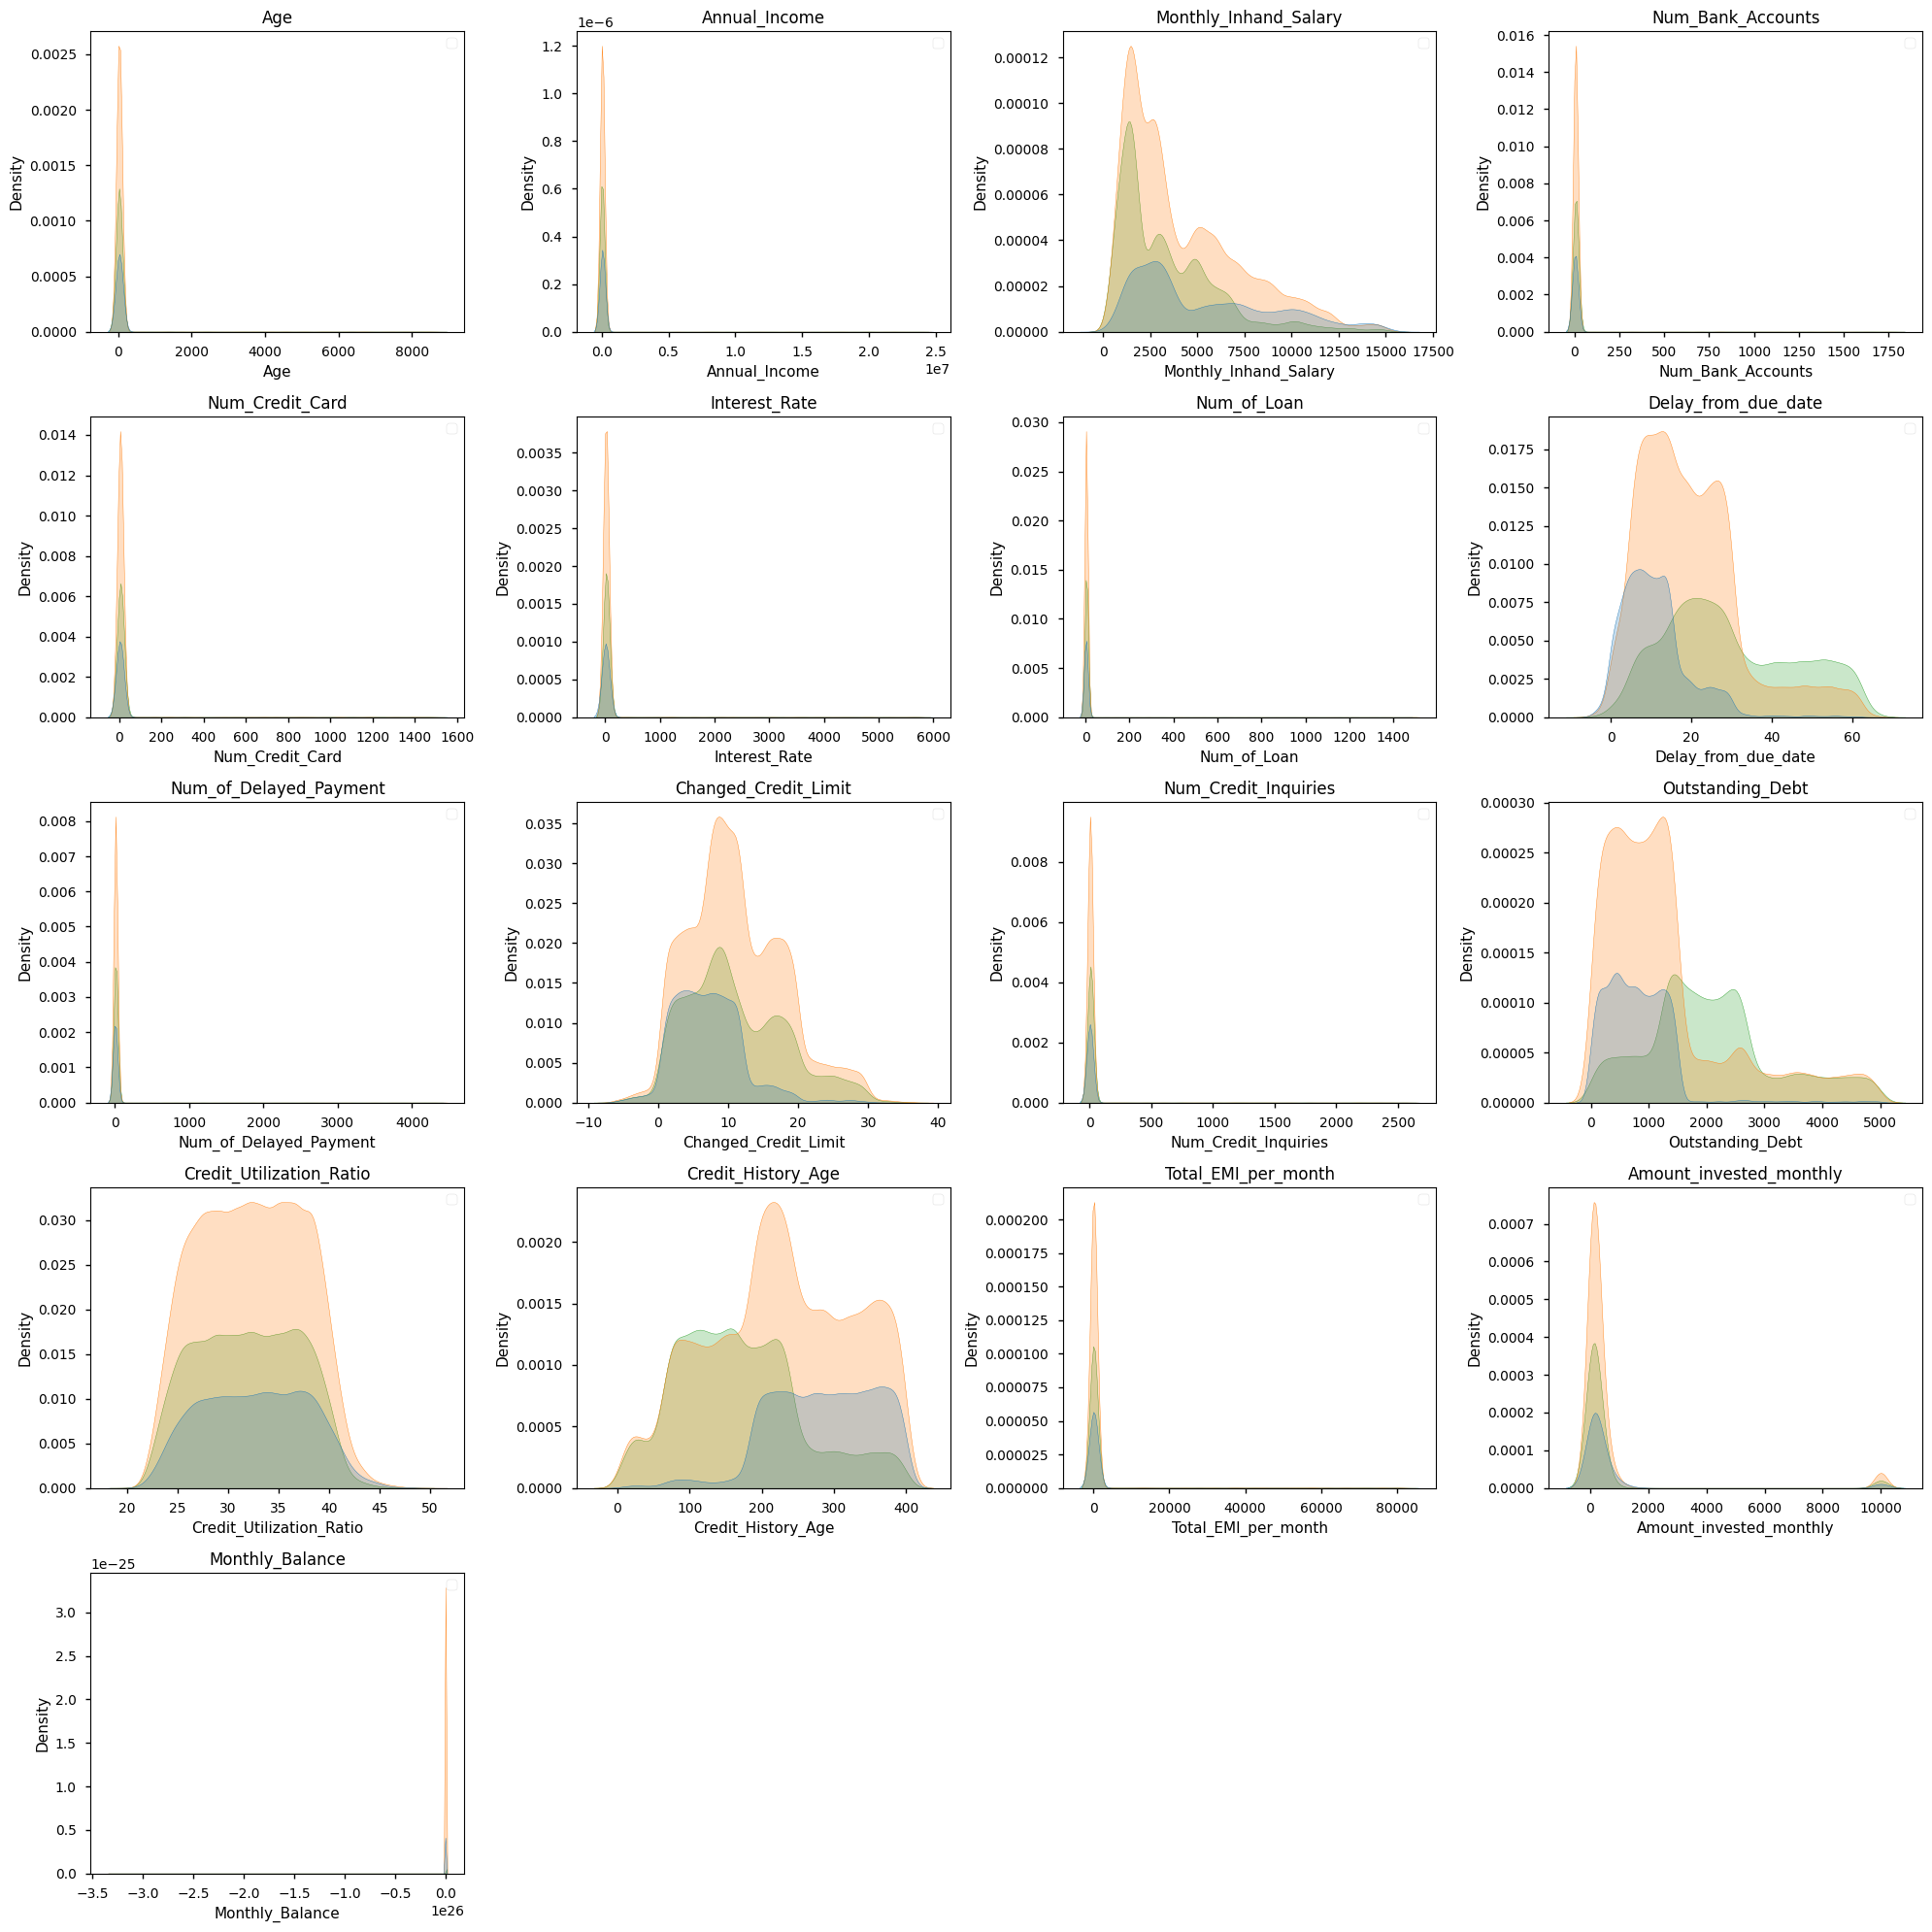

In [ ]:
plt.figure(figsize=(20,20))
for ax, col in enumerate(numerical_columns):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=df_copy[col],shade=True, hue=df_copy["Credit_Score"])
    plt.legend()

plt.tight_layout()


filling outliers with median value




In [ ]:
def outlier(df, col, low=0.25, up=0.75):
    Q1=df[col].quantile(low)
    Q3=df[col].quantile(up)
    IQR=Q3-Q1
    low_bound=Q1-1.5*IQR
    up_bound=Q3+1.5*IQR
    return low_bound, up_bound

def replace(dataframe, col):
    low_bound, up_bound = outlier(dataframe,col)
    dataframe.loc[(dataframe[col] < low_bound), col] = dataframe[col].median()
    dataframe.loc[(dataframe[col] > up_bound), col] = dataframe[col].median()

# extreme value checking
for col in numerical_columns:
    print(col)
    replace(df_copy,col)

Age
Annual_Income
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_Utilization_Ratio
Credit_History_Age
Total_EMI_per_month
Amount_invested_monthly
Monthly_Balance


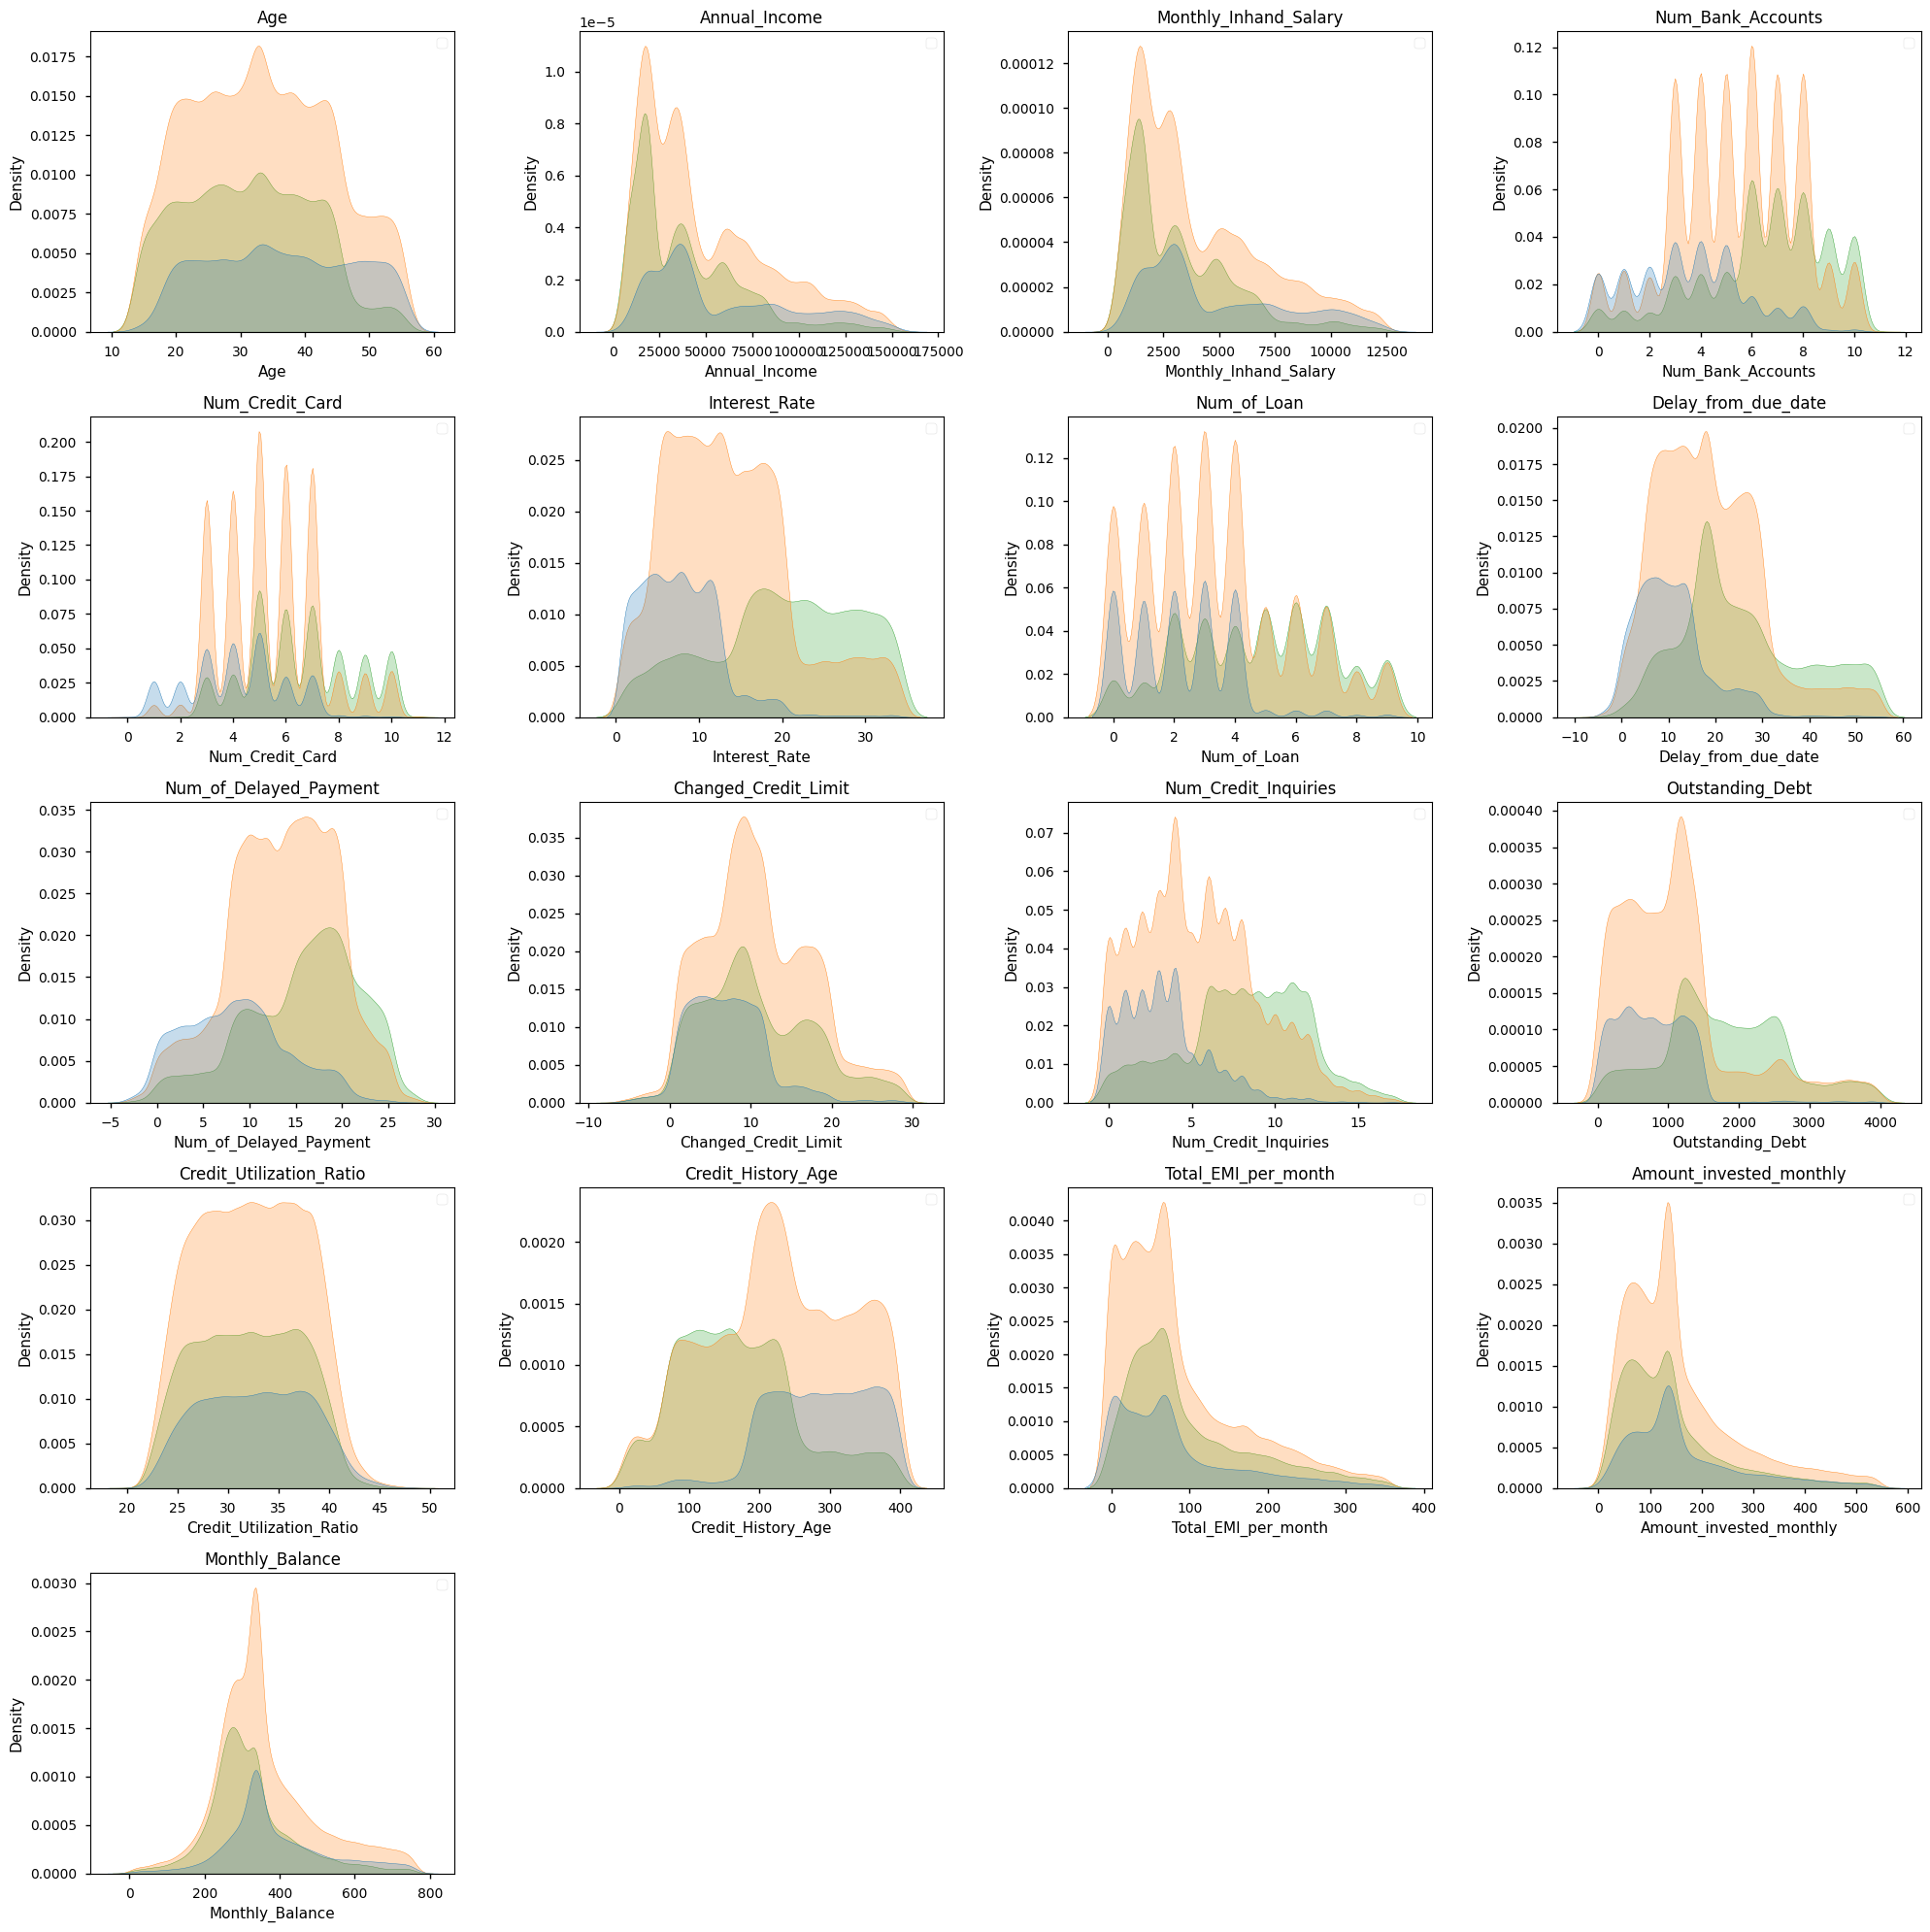

In [ ]:
plt.figure(figsize=(20,20))
for ax, col in enumerate(numerical_columns):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=df_copy[col],shade=True, hue=df_copy["Credit_Score"])
    plt.legend()

plt.tight_layout()

variables in which class distinctions are evident:

Num_Bank_Accounts
Num_Credict_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Num_Credit_Inquiries
Outstanding_Debt
Credict_History_Age

Exploratory Data Analysis

Credit Score distribution

In [ ]:
print(df_copy["Credit_Score"].value_counts().reset_index())
fig=px.pie(df_copy["Credit_Score"].value_counts().reset_index(), values="Credit_Score", names="index", title="The Distribution of Credict Score")
fig.show()

      index  Credit_Score
0  Standard         53174
1      Poor         28998
2      Good         17828


In [ ]:
m={ "Poor":0, "Standard":1, "Good":2 } #mapping to enable us ploting the below graphs

df_copy["Credit_Score"]=df_copy["Credit_Score"].map(m)
df_copy["Credit_Score"]

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [ ]:
print(df_copy["Occupation"].value_counts().reset_index())

            index  Occupation
0          Lawyer        7096
1        Engineer        6864
2       Architect        6824
3        Mechanic        6776
4       Scientist        6744
5      Accountant        6744
6       Developer        6720
7   Media_Manager        6720
8         Teacher        6672
9    Entrepreneur        6648
10         Doctor        6568
11     Journalist        6536
12        Manager        6432
13       Musician        6352
14         Writer        6304


In [ ]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Bar(x=df_copy["Occupation"].value_counts().reset_index()["index"], y=df_copy["Occupation"].value_counts().reset_index()["Occupation"], name="Occupation"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df_copy["Credit_Mix"].value_counts().reset_index()["index"], y=df_copy["Credit_Mix"].value_counts().reset_index()["Credit_Mix"], name="Credit_Mix"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=df_copy["Payment_of_Min_Amount"].value_counts().reset_index()["index"], y=df_copy["Payment_of_Min_Amount"].value_counts().reset_index()["Payment_of_Min_Amount"], name="Payment_of_Min_Amount"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=df_copy["Payment_Behaviour"].value_counts().reset_index()["index"], y=df_copy["Payment_Behaviour"].value_counts().reset_index()["Payment_Behaviour"], name="Payment_Behaviour"),
    row=2, col=2
)

fig.update_layout(height=600, width=800, title_text="Countplot")
fig.show()

In [ ]:
col_obj=df_copy.select_dtypes(include='object').columns.tolist()
col_obj

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

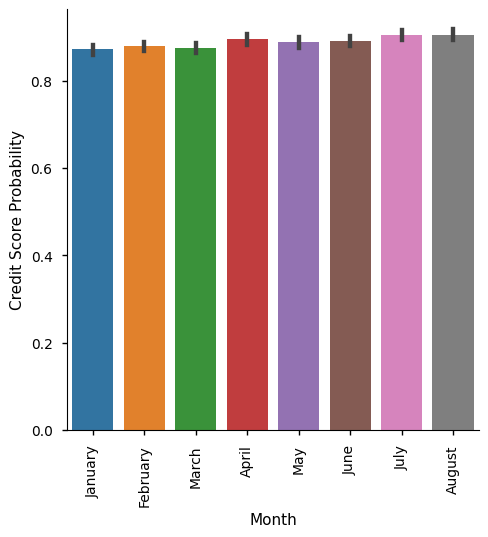

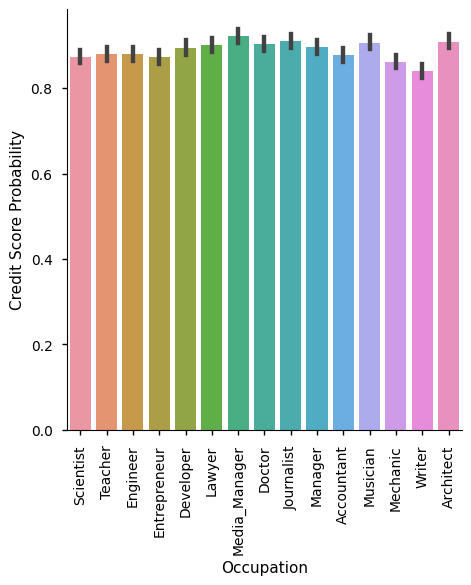

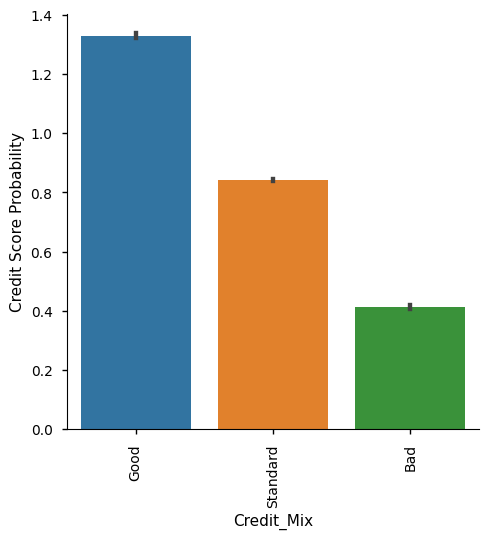

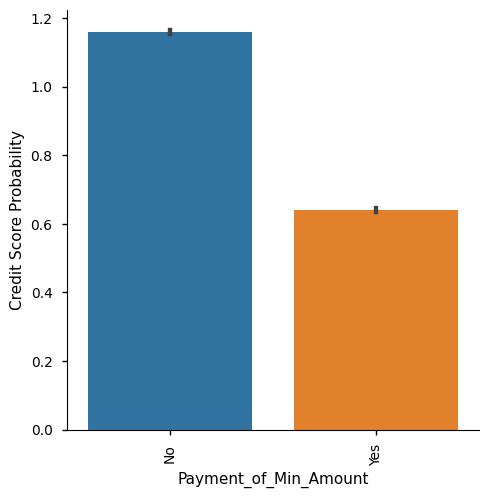

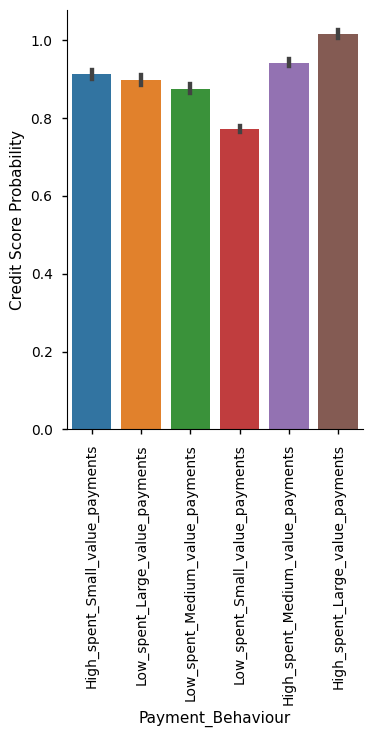

In [ ]:
for i in col_obj:
    g=sns.catplot(x=i, y="Credit_Score", data=df_copy, kind="bar")
    g.set_ylabels("Credit Score Probability")
    g.set_xticklabels(rotation=90)

    plt.show()

relationship between Categorical features and the respose Variable


The average credit scores show minimal variation within the month, occupation, and payment behavior variable groups. However, there is a noticeable distinction in credit score averages among groups in credit mix and minimum payment behavior. We propose consolidating groups with similar credit score averages in the Payment Behavior variable into a unified group.

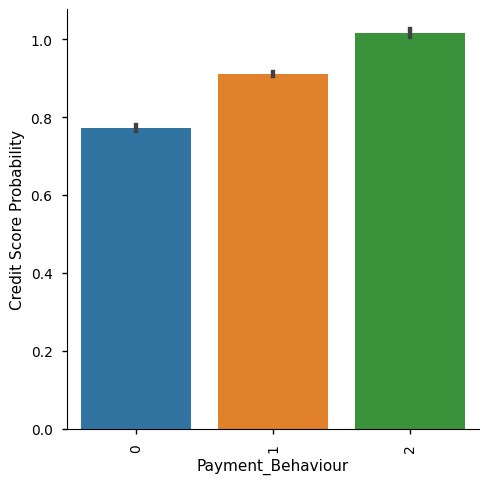

In [ ]:
df_copy["Payment_Behaviour"]=[0 if i=="Low_spent_Small_value_payments" else 2 if i=="High_spent_Large_value_payments" else 1 for i in df_copy["Payment_Behaviour"]]
df_copy["Payment_Behaviour"]=df_copy["Payment_Behaviour"].astype("object")

g=sns.catplot(x="Payment_Behaviour", y="Credit_Score", data=df_copy, kind="bar")
g.set_ylabels("Credit Score Probability")
g.set_xticklabels(rotation=90)

 Hypothesis testing:
 We will conduct a chi-square test to explore the dependency between categorical variables and the dependent variable. The hypotheses for this test are as follows:

H0: There is no relationship between the two variables.
H1: There is a significant relationship between the two variables.

In [ ]:
df_copy.info()
df_object=df_copy[["Month","Occupation","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit-Builder Loan",
         "Personal Loan","Debt Consolidation Loan",
          "Student Loan","Payday Loan","Mortgage Loan","Auto Loan","Home Equity Loan","Credit_Score"]].copy()

df_object["Credit_Score"]=df_copy["Credit_Score"]
df_object.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Credit_Score
0,January,Scientist,Good,No,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2
1,February,Scientist,Good,No,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2
2,March,Scientist,Good,No,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2
3,April,Scientist,Good,No,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2
4,May,Scientist,Good,No,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2


In [ ]:

def chi_square_test(df, f1,f2 ):
    occ=df[[f1,f2]]
    #contingency table
    tbl=pd.crosstab(index=occ[f1], columns=occ[f2])
    #chi2_test
    t,p,sd,expected=stats.chi2_contingency(tbl)
    return (t,p)
var=[]
t=[]
p=[]

for i in df_object.columns[:df_object.shape[1]-1].tolist():
    var.append(i)
    t.append(round(chi_square_test(df_object,i,"Credit_Score")[0],2))
    p.append(round(chi_square_test(df_object,i,"Credit_Score")[1],2))

df_chi2=pd.DataFrame()
df_chi2["Variable"]=var
df_chi2["Test"]=t
df_chi2["Pvalue"]=p

df_chi2=df_chi2.sort_values(by="Test",ascending=False)
df_chi2


,Variable,Test,Pvalue
2,Credit_Mix,40489.42,0.0
3,Payment_of_Min_Amount,16869.96,0.0
4,Payment_Behaviour,1427.94,0.0
11,Auto Loan,1251.14,0.0
6,Personal Loan,1070.70,0.0
9,Payday Loan,1021.91,0.0
5,Credit-Builder Loan,1014.97,0.0
8,Student Loan,982.29,0.0
7,Debt Consolidation Loan,948.89,0.0
10,Mortgage Loan,924.20,0.0


we remove the last two features that shows least chi square value


In [ ]:
df_copy.drop(["Month","Occupation"],axis=1,inplace=True)

Exploring the Impact of Numeric Variables on the Dependent Variable


In this segment, we will investigate the potential influence of numerical independent variables on the dependent variable through the utilization of box plots and ANOVA tests.

In [ ]:
df_numeric=df_copy.select_dtypes(include=["int","float"])
df_numeric=df_numeric[df_numeric.columns[1:-8]]
df_numeric.columns


Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

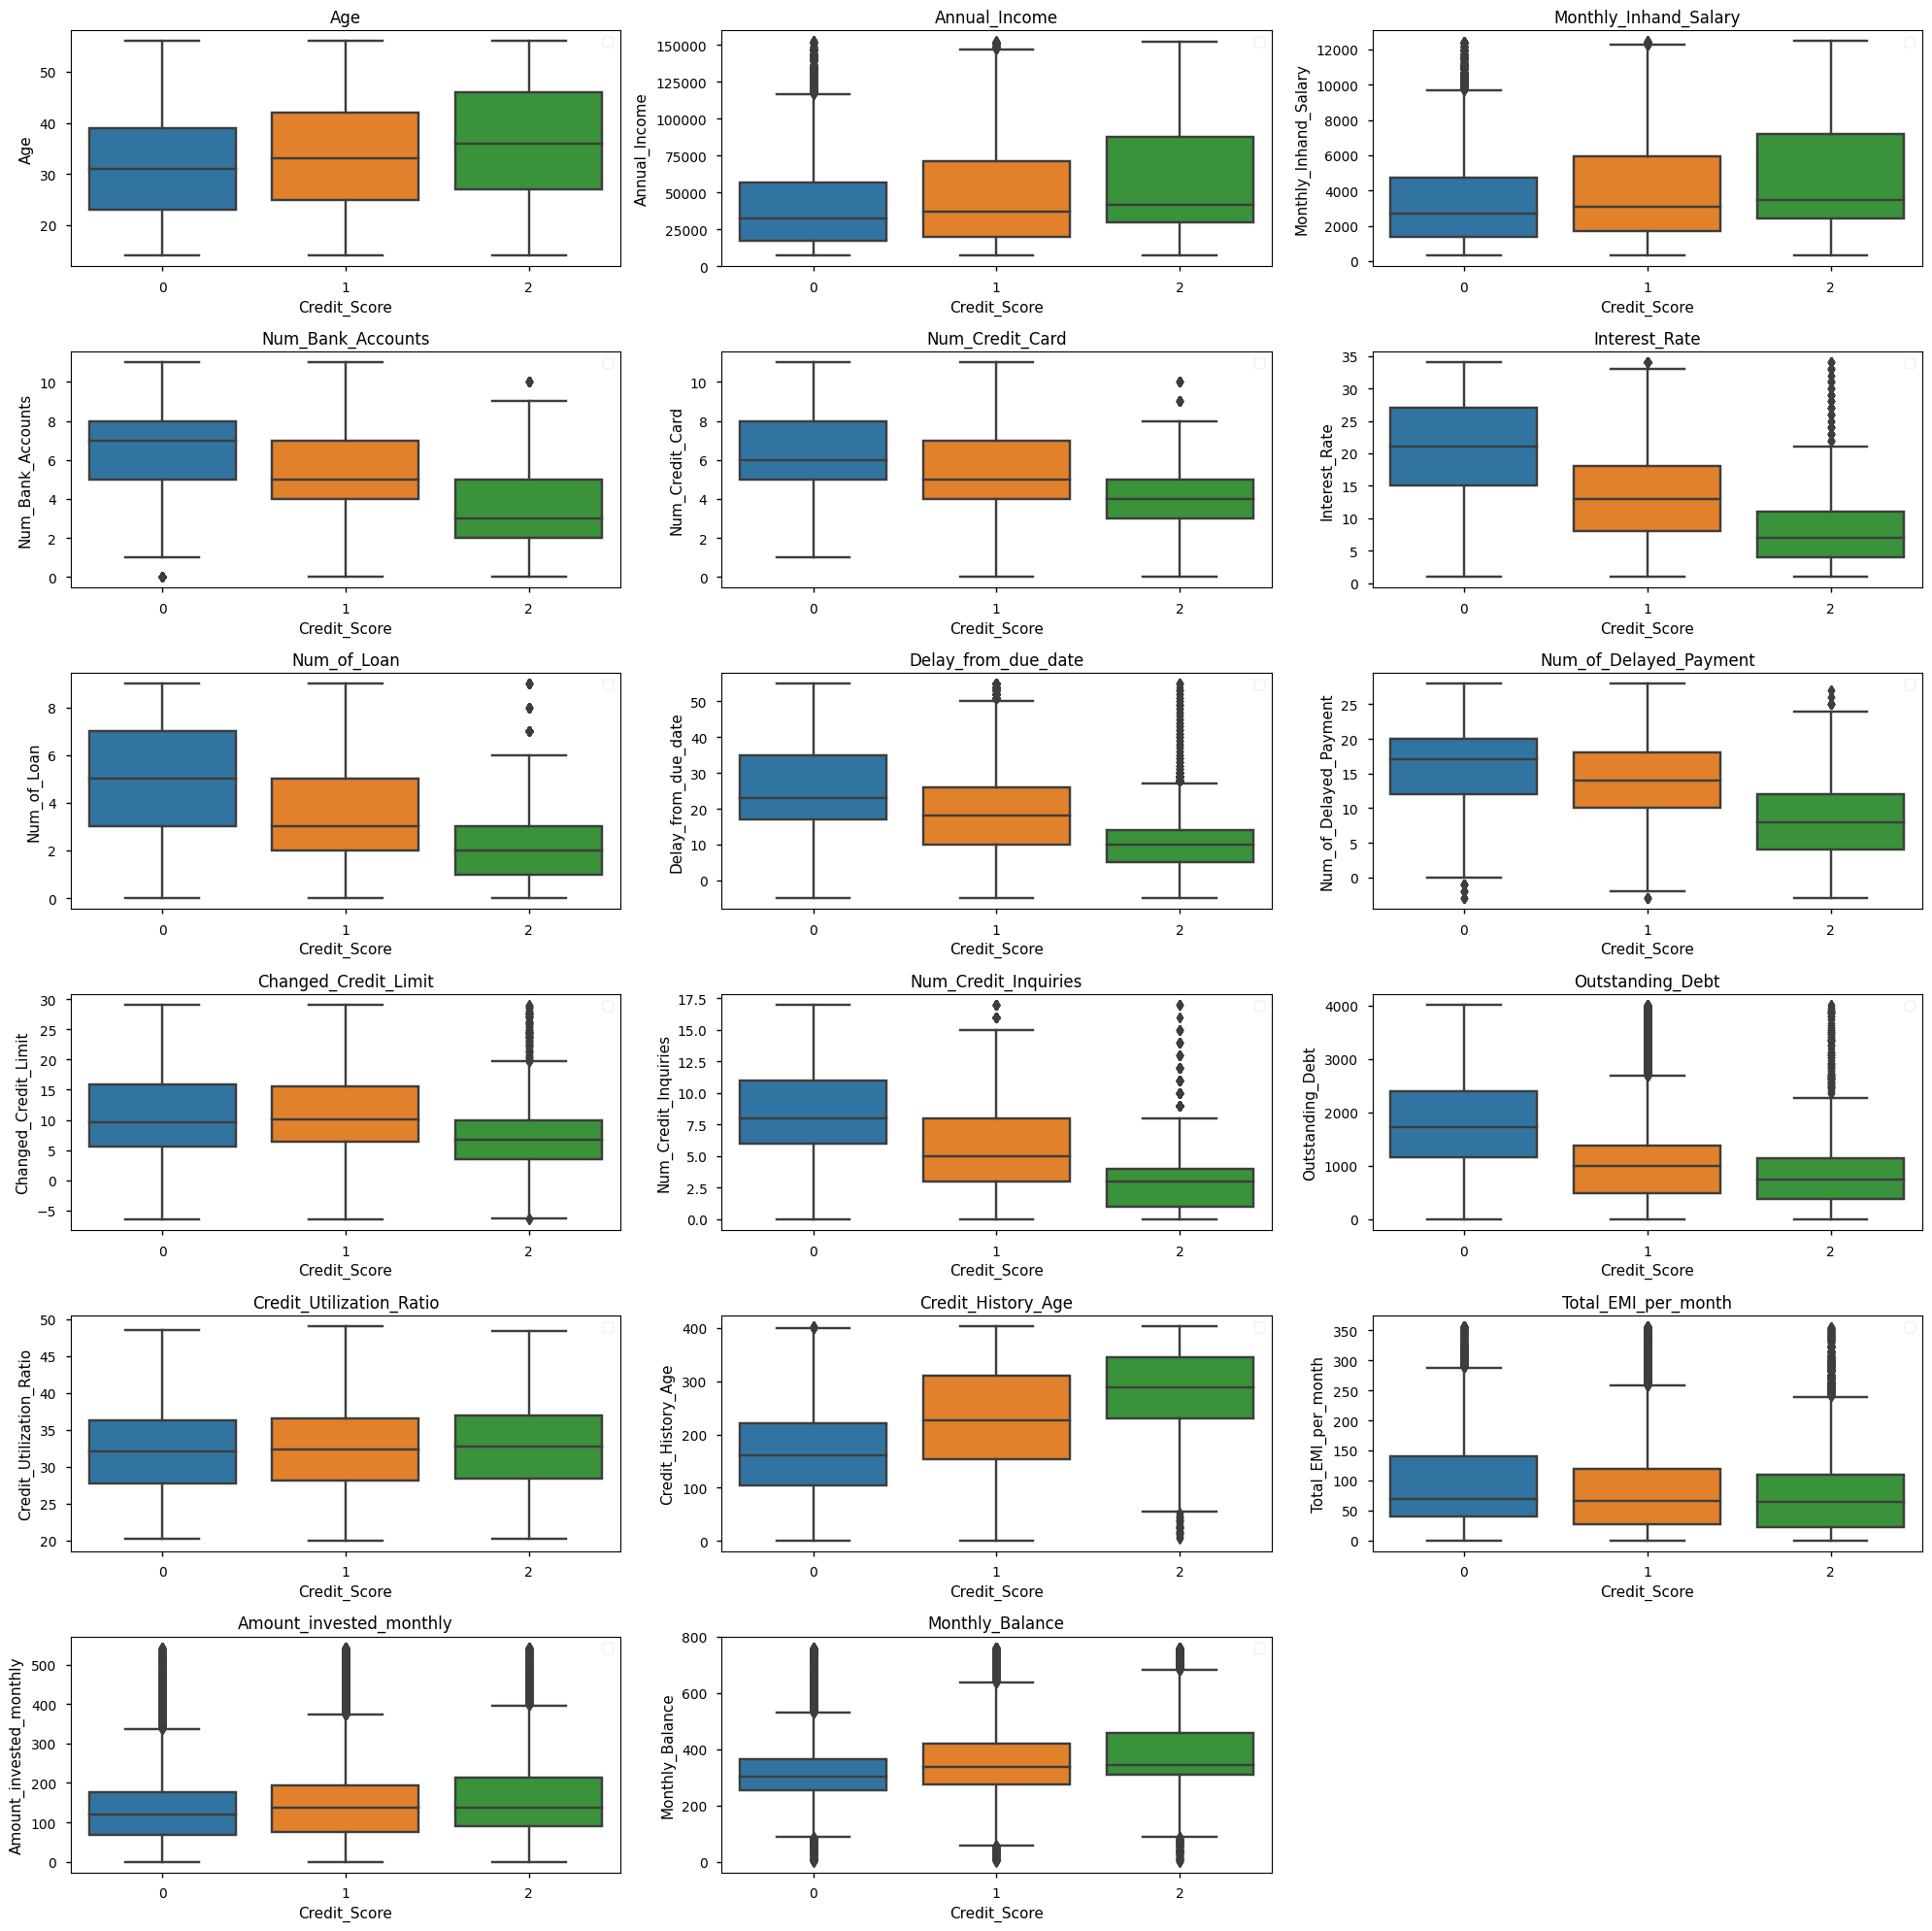

In [ ]:
plt.figure(figsize=(20,20))
for ax,col in enumerate(df_numeric.columns[:-1]):
  plt.subplot(6,3,ax+1)
  plt.title(col)
  sns.boxplot(data=df_numeric,x='Credit_Score',y=col)
  plt.legend()
  plt.tight_layout()

In the differentiation of the dependent variable, the median values for Credit Utilization, Total EMI per month, and Monthly Investment Amount are closely clustered together. The lack of significant differences in these values suggests that these variables may not have a substantial impact on the response variable.

Anova Test:


Using the ANOVA test, we statistically assess whether there are differences in the averages among at least two groups. We make two key assumptions: normality and homogeneity of variances. Given a large dataset, we assume the data follows a normal distribution, as suggested by the central limit theorem. We then check if the variances are roughly equal. If homogeneity is not met, we consider employing a non-parametric ANOVA test.

Test for Equality of Variances

H0: Variances exhibit homogeneity
H1: Variances do not display homogeneity

In [ ]:
def homogeneity(data,f1,f2):
    df=data[[f1,f2]]
    credit_zero=[]
    credit_one=[]
    credit_two=[]
    credit_zero=df[df[f2]==0][f1].values
    credit_one=df[df[f2]==1][f1].values
    credit_two=df[df[f2]==2][f1].values
    homogeneity_test=stats.bartlett(credit_zero,credit_one,credit_two)
    return homogeneity_test
t=[]
p=[]
variable=[]
for i in df_numeric.columns[:-1]:
  variable.append(i)
  t.append(homogeneity(df_numeric,i,'Credit_Score')[0])
  p.append(homogeneity(df_numeric,i,'Credit_Score')[1])
result=pd.DataFrame()
result['variable']=variable
result['test_value']=t
result['p_value']=p
result.sort_values(by='test_value',ascending=False)

,variable,test_value,p_value
5,Interest_Rate,6738.516459,0.000000e+00
11,Outstanding_Debt,5896.803172,0.000000e+00
7,Delay_from_due_date,5341.085488,0.000000e+00
6,Num_of_Loan,3487.596398,0.000000e+00
10,Num_Credit_Inquiries,2910.762010,0.000000e+00
9,Changed_Credit_Limit,2689.564671,0.000000e+00
13,Credit_History_Age,2394.243939,0.000000e+00
1,Annual_Income,1890.716804,0.000000e+00
2,Monthly_Inhand_Salary,1820.585321,0.000000e+00
16,Monthly_Balance,970.279267,2.025509e-211


this table shows variances are not homogenious so need to do non-parametric ANOVA test.(Welch's ANOVA test)

In [ ]:
def Welch(data,f1,f2):
    df=data[[f1,f2]]

    Welch_ANOVA_test=pg.welch_test(data=df,dv='f1',between='f2')
    return Welch_ANOVA
f=[]
p=[]
variable=[]
for i in df_numeric.columns[:-1]:
  variable.append(i)
  f.append(homogeneity(df_numeric,i,'Credit_Score')[0])
  p.append(homogeneity(df_numeric,i,'Credit_Score')[1])
result=pd.DataFrame()
result['variable']=variable
result['F_value']=f
result['p_value']=p
result.sort_values(by='F_value',ascending=False)

,variable,F_value,p_value
5,Interest_Rate,6738.516459,0.000000e+00
11,Outstanding_Debt,5896.803172,0.000000e+00
7,Delay_from_due_date,5341.085488,0.000000e+00
6,Num_of_Loan,3487.596398,0.000000e+00
10,Num_Credit_Inquiries,2910.762010,0.000000e+00
9,Changed_Credit_Limit,2689.564671,0.000000e+00
13,Credit_History_Age,2394.243939,0.000000e+00
1,Annual_Income,1890.716804,0.000000e+00
2,Monthly_Inhand_Salary,1820.585321,0.000000e+00
16,Monthly_Balance,970.279267,2.025509e-211


droping last 3 variables with least ANOVA value

In [ ]:
result=result.sort_values(by='F_value',ascending=False)
df_copy.drop(result['variable'][-3:].tolist(),axis=1,inplace=True)
df_copy.columns


Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

EXPLORATORY DATA ANALYSIS



customers with the most outsatnding debts


      Customer_ID  Outstanding_Debt
0         25630.0           4014.35
1         33540.0           4010.91
2         20367.0           4006.34
3         27396.0           4005.23
4         27461.0           4004.45
...           ...               ...
12495     43790.0              0.77
12496      6748.0              0.56
12497     50420.0              0.54
12498     14337.0              0.34
12499      1221.0              0.23

[12500 rows x 2 columns]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '25630.0'),
  Text(1, 0, '33540.0'),
  Text(2, 0, '20367.0'),
  Text(3, 0, '27396.0'),
  Text(4, 0, '27461.0'),
  Text(5, 0, '32150.0'),
  Text(6, 0, '49817.0'),
  Text(7, 0, '44016.0'),
  Text(8, 0, '23596.0'),
  Text(9, 0, '36095.0'),
  Text(10, 0, '29364.0'),
  Text(11, 0, '16896.0'),
  Text(12, 0, '45320.0'),
  Text(13, 0, '6465.0'),
  Text(14, 0, '18430.0')])

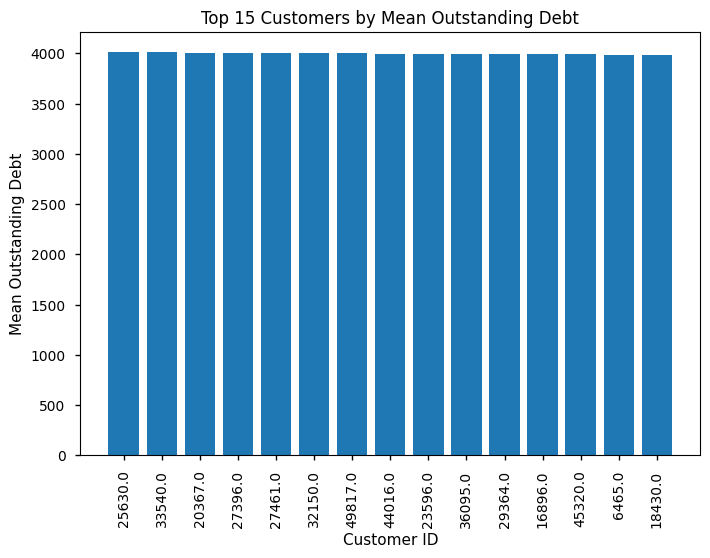

In [ ]:
outs_debt=pd.DataFrame(df_copy.groupby('Customer_ID')['Outstanding_Debt'].mean().sort_values(ascending=False))
outs_debt.reset_index(inplace=True)
outs_debt['Customer_ID']=outs_debt['Customer_ID'].astype('string')
print(outs_debt)

plt.bar(outs_debt['Customer_ID'][:15],outs_debt['Outstanding_Debt'][:15])
plt.xlabel('Customer ID')
plt.ylabel('Mean Outstanding Debt')
plt.title('Top 15 Customers by Mean Outstanding Debt')
plt.xticks(rotation=90)

# **Model:**


In [ ]:
df_copy.drop("Customer_ID",axis=1,inplace=True)


In [ ]:
df_copy.columns
df_copy.shape

(100000, 26)

In [ ]:
x=df_copy.drop("Credit_Score",axis=1)
y=df_copy["Credit_Score"]


In [ ]:
categorical_col=df_copy.select_dtypes(include="object").columns.tolist()
categorical_col
# one hot encoder function:
def one_hot_enc(df, categorical_col, drop_first=True):
    df = pd.get_dummies(df, columns=categorical_col, drop_first=True, dtype=int)
    return df

x=one_hot_enc(x,categorical_col,drop_first=True)
x.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_1,Payment_Behaviour_2
0,23.0,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,11.27,...,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0
1,23.0,19114.12,1824.843333,3.0,4,3,4.0,-1,6.5,11.27,...,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0
2,23.0,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,11.27,...,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0
3,23.0,19114.12,1824.843333,3.0,4,3,4.0,5,4.0,6.27,...,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0
4,23.0,19114.12,1824.843333,3.0,4,3,4.0,6,6.5,11.27,...,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0


In [ ]:
#changing type of loan columns type to int
x[x.columns.tolist()[14:-5]]=x[x.columns.tolist()[14:-5]].astype("int")
x.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_1,Payment_Behaviour_2
0,23.0,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,11.27,...,0,0,0,1,1,1,0,0,1,0
1,23.0,19114.12,1824.843333,3.0,4,3,4.0,-1,6.5,11.27,...,0,0,0,1,1,1,0,0,1,0
2,23.0,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,11.27,...,0,0,0,1,1,1,0,0,1,0
3,23.0,19114.12,1824.843333,3.0,4,3,4.0,5,4.0,6.27,...,0,0,0,1,1,1,0,0,0,0
4,23.0,19114.12,1824.843333,3.0,4,3,4.0,6,6.5,11.27,...,0,0,0,1,1,1,0,0,1,0


In [ ]:
scaler=StandardScaler()
x[x.columns.tolist()[0:14]]=scaler.fit_transform(x[x.columns.tolist()[0:14]])
x.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_1,Payment_Behaviour_2
0,-0.966976,-0.833654,-0.750629,-0.921974,-0.743642,-1.329061,0.192066,-1.298842,-1.006758,0.157512,...,0,0,0,1,1,1,0,0,1,0
1,-0.966976,-0.833654,-0.750629,-0.921974,-0.743642,-1.329061,0.192066,-1.615326,-1.086370,0.157512,...,0,0,0,1,1,1,0,0,1,0
2,-0.966976,-0.833654,-0.750629,-0.921974,-0.743642,-1.329061,0.192066,-1.298842,-1.006758,0.157512,...,0,0,0,1,1,1,0,0,1,0
3,-0.966976,-0.833654,-0.750629,-0.921974,-0.743642,-1.329061,0.192066,-1.140600,-1.484431,-0.604510,...,0,0,0,1,1,1,0,0,0,0
4,-0.966976,-0.833654,-0.750629,-0.921974,-0.743642,-1.329061,0.192066,-1.061479,-1.086370,0.157512,...,0,0,0,1,1,1,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Oversampling:SMOTE
addressing the issue of imbalanced distribution of categorical response variable

In [ ]:
print(f"number of observations with credit score equals to 2: {sum(y_train==2)}")
print(f"number of observations with credit score equals to 1: {sum(y_train==1)}")
print(f"number of observations with credit score equals to 0: {sum(y_train==0)}")

number of observations with credit score equals to 2: 14236
number of observations with credit score equals to 1: 42559
number of observations with credit score equals to 0: 23205


In [ ]:
sm = SMOTE(random_state=1)
SMOTE_train_X, SMOTE_train_Y = sm.fit_resample(X_train, y_train)
print(f"number of observations with credit score equals to 2: {sum(SMOTE_train_Y==2)}")
print(f"number of observations with credit score equals to 1: {sum(SMOTE_train_Y==1)}")
print(f"number of observations with credit score equals to 0: {sum(SMOTE_train_Y==0)}")

number of observations with credit score equals to 2: 42559
number of observations with credit score equals to 1: 42559
number of observations with credit score equals to 0: 42559


Artificial variables were introduced to the dataset using the SMOTE method. This was done to balance the distribution of the independent variable groups, ensuring equal representation. The aim is to mitigate biased learning and promote a more equitable learning process.

Our dataset exhibits high dimensionality, prompting the need to address the curse of dimensionality, especially when implementing models like k-nearest neighbors (KNN). To mitigate this challenge, we employ Principal Component Analysis (PCA) to reduce dimensionality while retaining a substantial portion of the information contained in the dataset. This allows us to enhance model performance and efficiency in the presence of numerous features.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

# Fit and transform the standardized data
X_pca = pca.fit_transform(SMOTE_train_X)

#Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#Determine the number of components to retain (e.g., 95% of variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)
#Step 6: Select the top 'num_components' components
pca = PCA(n_components=num_components)
X__train_reduced = pca.fit_transform(SMOTE_train_X)
X_test_reduced=pca.transform(X_test)

20


In [ ]:
models=["BC","SVC","KNN","RF","XGB","LightGBM"]
classes=[BaggingClassifier(random_state=0),SVC(random_state=0),KNeighborsClassifier(),RandomForestClassifier(random_state=0),XGBClassifier(),
        LGBMClassifier(random_state=0)]

def solution(model):
    model.fit(X__train_reduced,SMOTE_train_Y)
    return model

def score(model2):
    predict=solution(model2).predict(X_test_reduced)
    asc=accuracy_score(y_test,predict)
    return asc

In [ ]:
success=[]

for i in classes:
    success.append(score(i))

a=list(zip(models,success))
conclusion=pd.DataFrame(a,columns=["Model","Succes"])
conclusion.sort_values("Succes",ascending=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 127677, number of used features: 20
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


,Model,Succes
2,KNN,0.78110
3,RF,0.77760
0,BC,0.74840
4,XGB,0.73045
5,LightGBM,0.70040
1,SVC,0.70005


# Hyperparameter Optimizartion


In [ ]:
knn=KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 20))}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X__train_reduced,SMOTE_train_Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

print("Best Hyperparameters:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 1}
Best Hyperparameters: 0.8760626941227162


In [ ]:
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test_reduced)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Accuracy: 76.80%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[4500 1264   29]
 [1355 8246 1014]
 [  24  954 2614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      5793
           1       0.79      0.78      0.78     10615
           2       0.71      0.73      0.72      3592

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000



In [ ]:
#rf_classifier = RandomForestClassifier()

# Define a grid of hyperparameter values to search
#param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search with cross-validation
#grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X__train_reduced,SMOTE_train_Y)

# Get the best hyperparameters
#best_hyperparameters = grid_search.best_params_

KeyboardInterrupt: ignored


Given the substantial size of the dataset, the available CPU resources are inadequate for conducting hyperparameter optimization specifically for the Random Forest (RF) model.

In [73]:
# Random Forest:
RF=RandomForestClassifier(random_state=0)
RF.fit(X__train_reduced,SMOTE_train_Y)
RF_predict=RF.predict(X_test_reduced)

RF_accuracy=accuracy_score(y_test,RF_predict)
print(RF_accuracy)

0.7776


In [74]:
RF_class_report = classification_report(y_test, RF_predict)
print("\nClassification Report:")
print(RF_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      5793
           1       0.84      0.75      0.79     10615
           2       0.66      0.79      0.72      3592

    accuracy                           0.78     20000
   macro avg       0.76      0.79      0.77     20000
weighted avg       0.79      0.78      0.78     20000



In [77]:
votingClass=VotingClassifier(estimators=[("KNN",KNeighborsClassifier(n_neighbors=1)),
                                    ("RF",RandomForestClassifier(random_state=0)),
                                    ("BC",BaggingClassifier(random_state=0))],
                        voting="soft", n_jobs=-1)

votingClass.fit(X__train_reduced,SMOTE_train_Y)
print(accuracy_score(votingClass.predict(X_test_reduced),y_test))

0.77705
